### Box-Jenkins Methodology for Time Series Modeling and Forecasting


### Step 1: Model Identification
* **Data Analysis**: Examine the time series data for trends, seasonality, and anomalies.
* **Differencing**: Apply differencing if the series is non-stationary due to trends or seasonality.
* **Order Identification**: Use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to determine the orders p, d, and q for the ARIMA model#.

## Step 2: Model Estimation
* **Parameter Estimation**: Use estimation methods (e.g., least squares) to estimate the parameters of the ARIMA mo#del.

## Step 3: Model Verification
* **Model Diagnostics**: Check if the residuals of the ARIMA model are white noise (i.e., no significant structure or correlation).
* **Model Adjustment**: If the model does not meet the white noise criteria, adjust the orders of the ARIMA model and repeat the previous steps.
* **Validation**: Validate the model's performance by making predictions on validation data or using evaluation metrics such as RMSE (Root Mean Square Error) or AIC (Akaike Information Cr iterion).

## Note
The Box-Jenkins methodology is iterative, meaning the identification, estimation, and verification steps may be repeated multiple times to improve the model. The goal is to find the best ARIMA model that captures the important patterns and characteristics of the time series and can be used for accurate predictions.
te predictions.


## ARIMA(employment)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
file_path = "C:\\Users\\Catello\\Desktop\\IAMDS2\\Statistiques\\employment.csv"
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   datestamp                       122 non-null    object 
 1   Agriculture                     122 non-null    float64
 2   Business services               122 non-null    float64
 3   Construction                    122 non-null    float64
 4   Durable goods manufacturing     122 non-null    float64
 5   Education and Health            122 non-null    float64
 6   Finance                         122 non-null    float64
 7   Government                      122 non-null    float64
 8   Information                     122 non-null    float64
 9   Leisure and hospitality         122 non-null    float64
 10  Manufacturing                   122 non-null    float64
 11  Mining and Extraction           122 non-null    float64
 12  Nondurable goods manufacturing  122 

In [4]:
df.head()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [5]:
# df=df.drop_duplicates()
# df=df.dropna() 

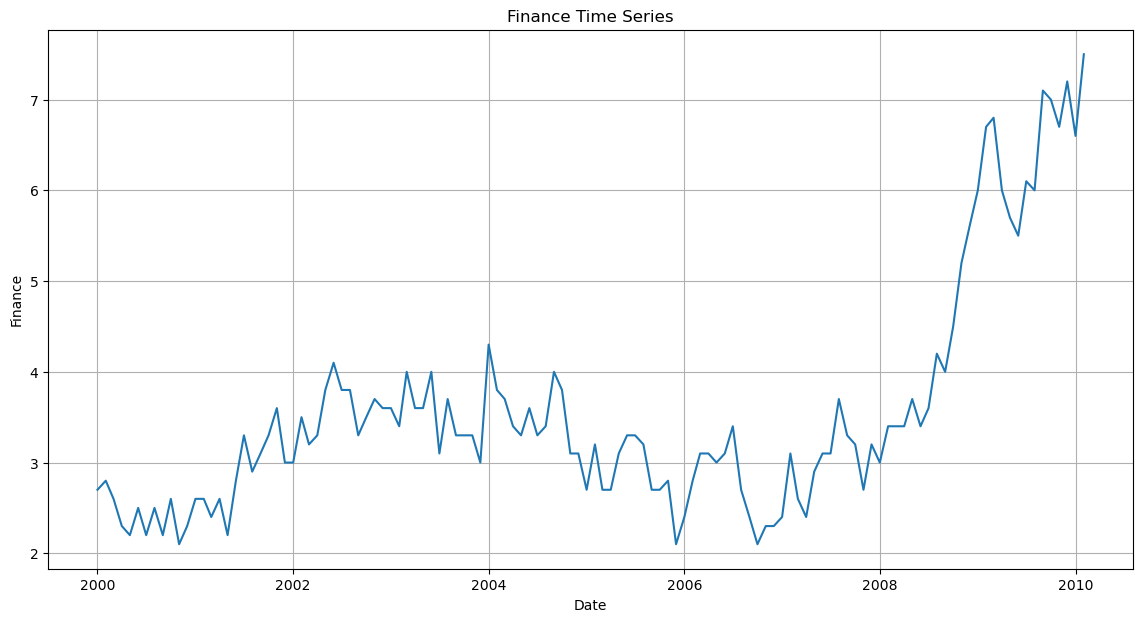

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datestamp' is in datetime format
df['datestamp'] = pd.to_datetime(df['datestamp'])

# Set 'datestamp' as the index
df.set_index('datestamp', inplace=True)

# Plot the time series data
plt.figure(figsize=(14,7))
plt.plot(df['Finance'])
plt.title('Finance Time Series')
plt.xlabel('Date')
plt.ylabel('Finance')
plt.grid(True)
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Finance'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Finance' column is stationary.")
else:
    print("The 'Finance' column is non-stationary.")

ADF Statistic: 0.280311
p-value: 0.976423
The 'Finance' column is non-stationary.


In [8]:
differenced = df['Finance'].diff()
differenced.head()

datestamp
2000-01-01    NaN
2000-02-01    0.1
2000-03-01   -0.2
2000-04-01   -0.3
2000-05-01   -0.1
Name: Finance, dtype: float64

ADF Statistic: -14.001350
p-value: 0.000000
The 'Finance' column is stationary.


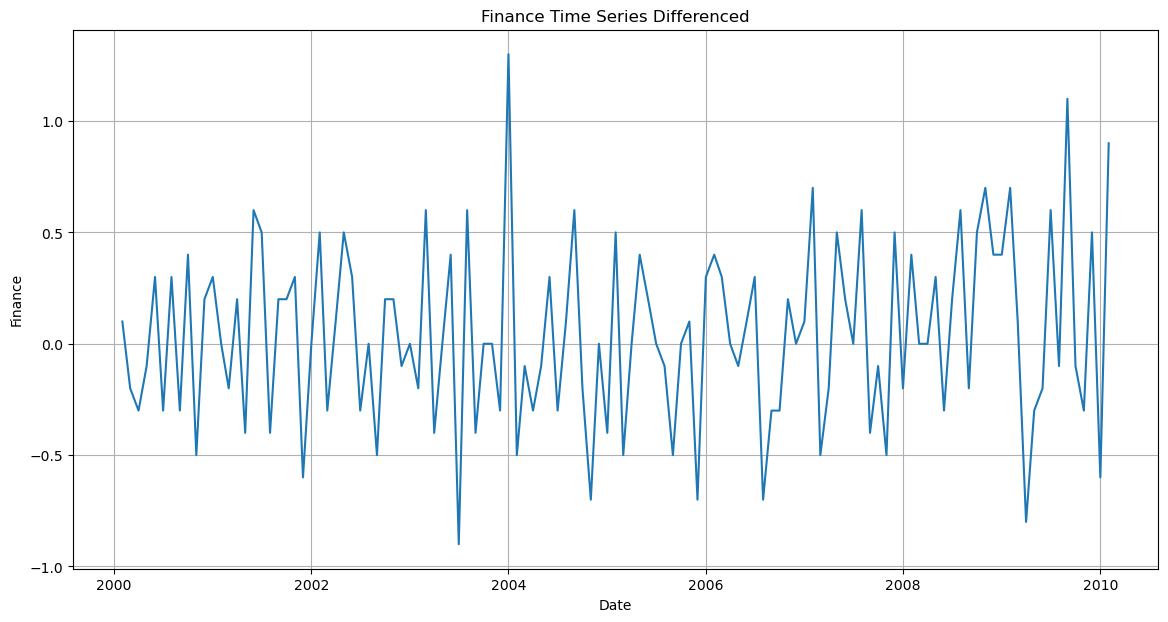

In [9]:
result = adfuller(differenced.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Finance' column is stationary.")
else:
    print("The 'Finance' column is non-stationary.")
    
plt.figure(figsize=(14,7))
plt.plot(differenced)
plt.title('Finance Time Series Differenced')
plt.xlabel('Date')
plt.ylabel('Finance')
plt.grid(True)
plt.show()

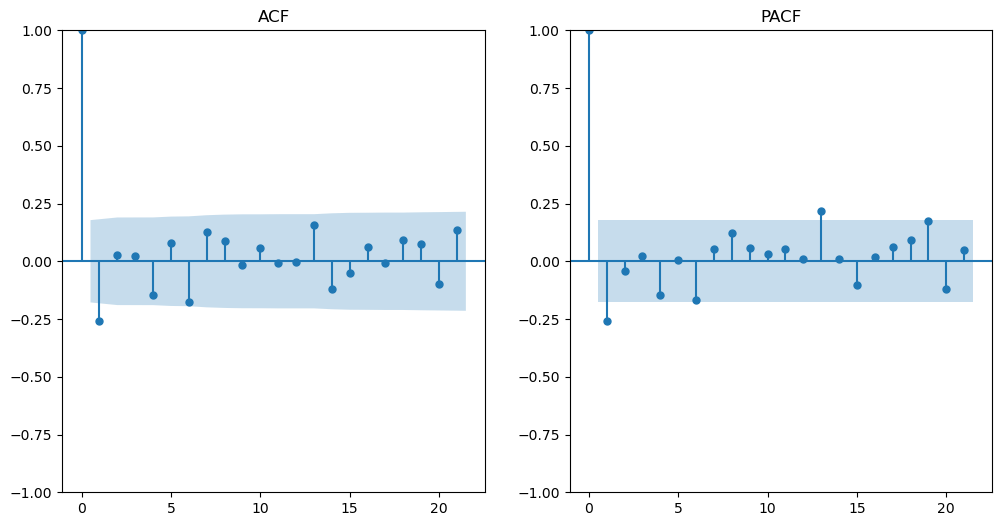

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(differenced.dropna(), ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(differenced.dropna(), ax=plt.gca())
plt.title('PACF')

plt.show()


In [11]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


In [12]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Finance'], order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Finance   No. Observations:                   97
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -34.565
Date:                Wed, 25 Sep 2024   AIC                             75.130
Time:                        09:00:50   BIC                             82.823
Sample:                    01-01-2000   HQIC                            78.240
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3136      0.206      1.521      0.128      -0.090       0.718
ma.L1         -0.7438      0.136     -5.482      0.000      -1.010      -0.478
sigma2         0.1198      0.017      7.131      0.0

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
predictions = model_fit.predict(start=len(train), end=len(df)-1)

In [14]:
print(test['Finance'].head())
print(predictions.head().round(2))

datestamp
2008-02-01    3.4
2008-03-01    3.4
2008-04-01    3.4
2008-05-01    3.7
2008-06-01    3.4
Name: Finance, dtype: float64
2008-02-01    3.03
2008-03-01    3.04
2008-04-01    3.05
2008-05-01    3.05
2008-06-01    3.05
Freq: MS, Name: predicted_mean, dtype: float64


In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Finance'],predictions)

print(error.round(2))

7.51


In [16]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljungbox_result = acorr_ljungbox(model_fit.resid.dropna(), lags=[ 10], return_df=True)

lb_stat = ljungbox_result.iloc[0]['lb_stat']
lb_pvalue = ljungbox_result.iloc[0]['lb_pvalue']

print(f"Ljung-Box Statistic: {lb_stat.round(2)}")
print(f"P-value: {lb_pvalue.round(2)}")

if lb_pvalue > 0.05:
    print("No significant seasonality detected.")
else:
    print("Significant seasonality detected.")



Ljung-Box Statistic: 4.9
P-value: 0.9
No significant seasonality detected.


In [17]:
from scipy import stats

shapiro_test = stats.shapiro(model_fit.resid.dropna())
shapiro_statistic = shapiro_test[0]
shapiro_pvalue = shapiro_test[1]

print(f"Shapiro-Wilk Statistic: {shapiro_statistic.round(2)}")
print(f"P-value: {shapiro_pvalue.round(2)}")

if shapiro_pvalue > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are not normally distributed.")


Shapiro-Wilk Statistic: 0.85
P-value: 0.0
Residuals are not normally distributed.


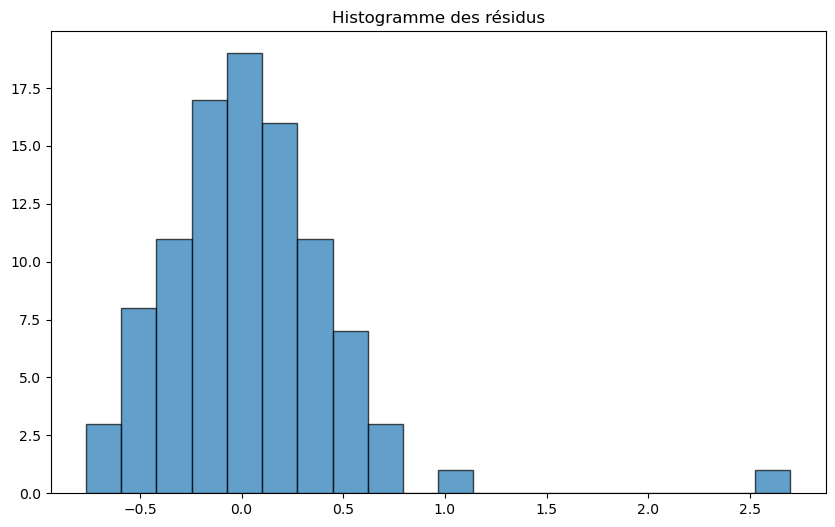

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(10,6))
plt.hist(model_fit.resid, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogramme des résidus')
plt.show()

## ARIMA(energie)

In [19]:
import pandas as pd
file_path = "C:\\Users\\Catello\\Desktop\\IAMDS2\\Statistiques\\energie.csv"
df = pd.read_csv(file_path, sep=';')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Mois                                      1403 non-null   object 
 1   Qualité                                   1403 non-null   object 
 2   Territoire                                1403 non-null   object 
 3   Production totale                         1403 non-null   int64  
 4   Production nucléaire                      913 non-null    float64
 5   Production thermique totale               1403 non-null   int64  
 6   Production thermique charbon              974 non-null    float64
 7   Production thermique fioul                1403 non-null   int64  
 8   Production thermique gaz                  1403 non-null   int64  
 9   Production hydraulique                    1403 non-null   int64  
 10  Production éolien                   

In [21]:
df.head(5)

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [22]:
df['Mois']=pd.to_datetime(df['Mois'])
df=df.set_index('Mois')
df=df.select_dtypes(exclude=['object'])

In [23]:
df.duplicated().sum()
df.isnull().sum()

Production totale                              0
Production nucléaire                         490
Production thermique totale                    0
Production thermique charbon                 429
Production thermique fioul                     0
Production thermique gaz                       0
Production hydraulique                         0
Production éolien                              0
Production solaire                             0
Production bioénergies                         0
Consommation totale                            0
Solde exportateur                             84
Echanges export                             1281
Echanges import                             1281
Echanges avec le Royaume-Uni                1281
Echanges avec l'Espagne                     1281
Echanges avec l'Italie                      1281
Echanges avec la Suisse                     1281
Echanges avec l'Allemagne et la Belgique    1297
dtype: int64

<Axes: xlabel='Mois'>

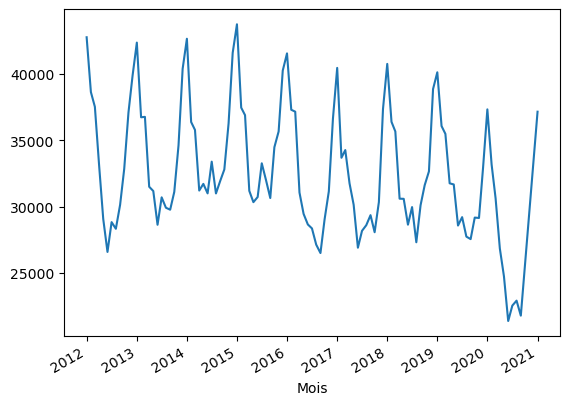

In [24]:
df=df.dropna()
df['Production nucléaire'].plot()

In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Production nucléaire'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Production nucléaire' column is stationary.")
else:
    print("The 'Production nucléaire' column is non-stationary.")

ADF Statistic: -1.200955
p-value: 0.673185
The 'Production nucléaire' column is non-stationary.


In [26]:
differenced = df['Production nucléaire'].diff()
differenced.head()

Mois
2012-01-01       NaN
2012-02-01   -4150.0
2012-03-01   -1112.0
2012-04-01   -4449.0
2012-05-01   -4042.0
Name: Production nucléaire, dtype: float64

ADF Statistic: -3.535153
p-value: 0.007129
The 'Finance' column is stationary.


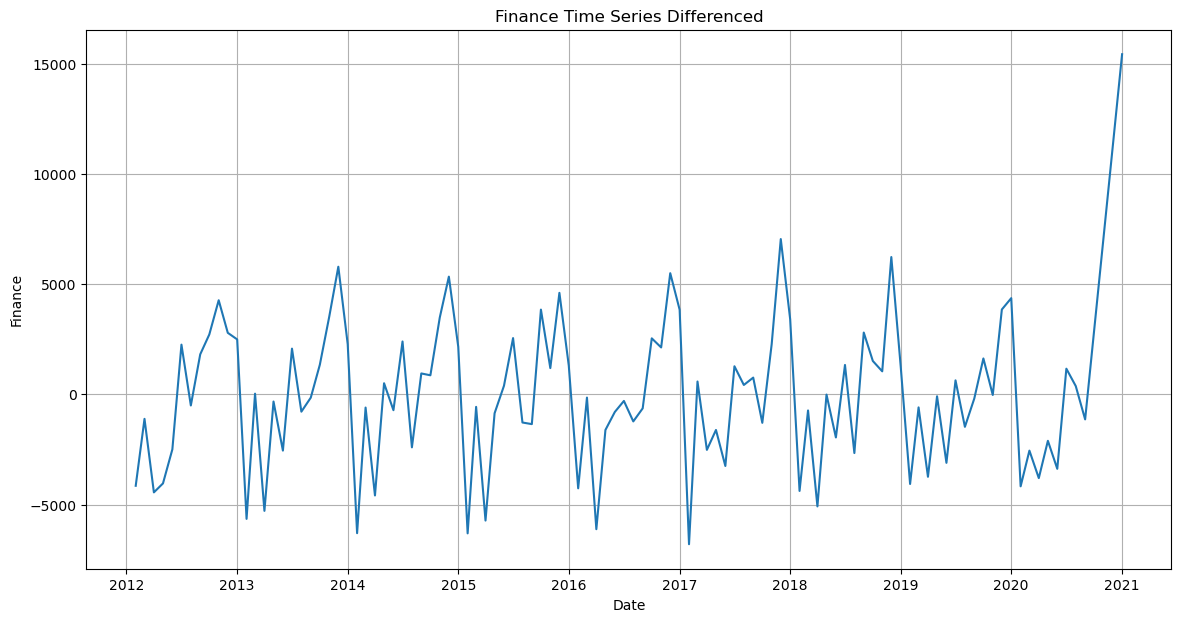

In [27]:
result = adfuller(differenced.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Finance' column is stationary.")
else:
    print("The 'Finance' column is non-stationary.")
    
plt.figure(figsize=(14,7))
plt.plot(differenced)
plt.title('Finance Time Series Differenced')
plt.xlabel('Date')
plt.ylabel('Finance')
plt.grid(True)
plt.show()

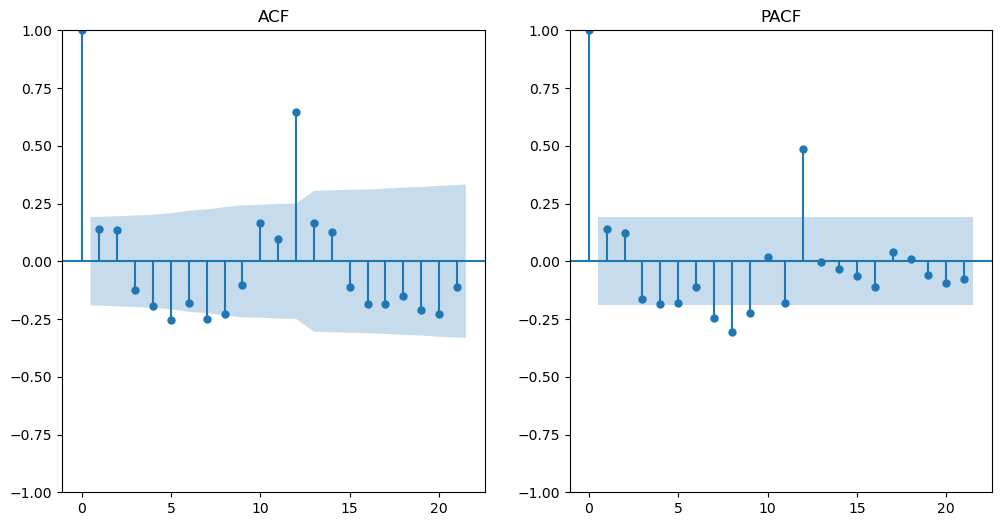

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(differenced.dropna(), ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(differenced.dropna(), ax=plt.gca())
plt.title('PACF')

plt.show()


In [29]:
train_size=int(len(df)*0.8)
train=df[:train_size]
test=df[train_size:]

In [30]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Production nucléaire'],order=(0,1,0))
model_fit=model.fit()

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
predictions=model_fit.predict(start=train_size,end=len(df)-1)

In [32]:
print(test['Production nucléaire'].head())
print(predictions.head().round(2))

Mois
2019-01-01    40157.0
2019-02-01    36089.0
2019-03-01    35497.0
2019-04-01    31756.0
2019-05-01    31668.0
Name: Production nucléaire, dtype: float64
2019-01-01    38890.0
2019-02-01    38890.0
2019-03-01    38890.0
2019-04-01    38890.0
2019-05-01    38890.0
Freq: MS, Name: predicted_mean, dtype: float64


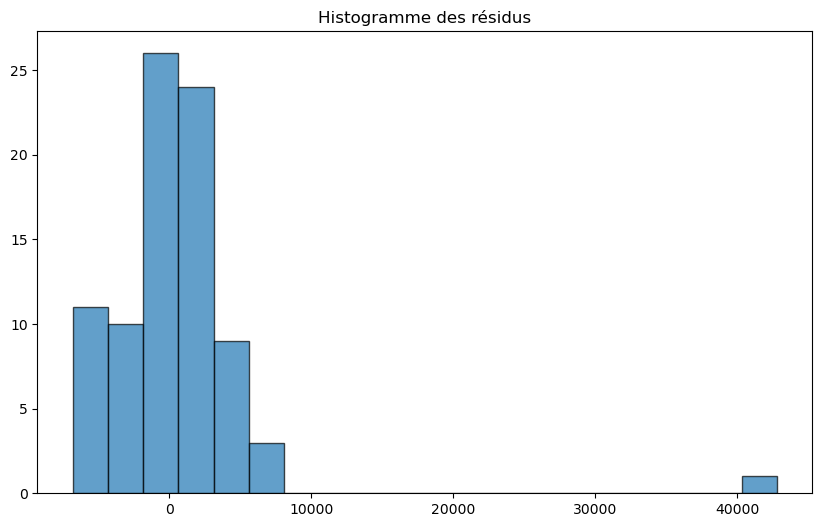

In [33]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogramme des résidus
plt.figure(figsize=(10,6))
plt.hist(model_fit.resid, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogramme des résidus')
plt.show()

In [34]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljungbox_result = acorr_ljungbox(model_fit.resid.dropna(), lags=[ 10], return_df=True)

lb_stat = ljungbox_result.iloc[0]['lb_stat']
lb_pvalue = ljungbox_result.iloc[0]['lb_pvalue']

print(f"Ljung-Box Statistic: {lb_stat.round(2)}")
print(f"P-value: {lb_pvalue.round(2)}")

if lb_pvalue > 0.05:
    print("No significant seasonality detected.")
else:
    print("Significant seasonality detected.")



Ljung-Box Statistic: 6.49
P-value: 0.77
No significant seasonality detected.


In [35]:
df.tail(5)

,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Mois,,,,,,,,,,,,,,,,,,,
2020-06-01,34501,21334.0,2498,11.0,127,2359,6359,2046,1472,789,30763,3164.0,5801.0,2637.0,496.0,797.0,341.0,704.0,823.0
2020-07-01,34489,22499.0,2771,142.0,184,2445,4599,2100,1694,824,32970,1070.0,4598.0,3527.0,-244.0,329.0,1194.0,217.0,-426.0
2020-08-01,33546,22876.0,2646,58.0,172,2414,3672,2043,1507,800,31428,1591.0,4616.0,3024.0,655.0,54.0,714.0,81.0,86.0
2020-09-01,32171,21739.0,2962,271.0,157,2532,3354,2142,1224,747,32307,-410.0,3505.0,4223.0,171.0,-752.0,725.0,-80.0,-301.0
2021-01-01,55421,37176.0,5704,795.0,169,4739,7320,3944,434,839,52983,1946.0,6757.0,4962.0,1364.0,512.0,966.0,1183.0,-2233.0


In [36]:
print(df.index[-1])

2021-01-01 00:00:00


In [37]:
nouveaupred=model_fit.predict(start=len(df)+2,end=len(df)+12)
nouveaupred

2021-01-01    38890.0
2021-02-01    38890.0
2021-03-01    38890.0
2021-04-01    38890.0
2021-05-01    38890.0
2021-06-01    38890.0
2021-07-01    38890.0
2021-08-01    38890.0
2021-09-01    38890.0
2021-10-01    38890.0
2021-11-01    38890.0
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
import pandas as pd
import pmdarima as pm

data = train['Production nucléaire']

model2 = pm.AutoARIMA()
model2_fit = model2.fit(data)

print(model2_fit.summary())
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -773.830
Date:                Wed, 25 Sep 2024   AIC                           1561.660
Time:                        09:00:57   BIC                           1578.676
Sample:                    01-01-2012   HQIC                          1568.501
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.655e+04   4287.566      3.860      0.000    8144.560     2.5e+04
ar.L1          0.6047      0.099      6.132      0.000       0.411       0.798
ar.L2          0.7461      0.076      9.759      0.0

In [39]:
predictions2 = model2_fit.predict(n_periods=22)
print("Prévisions pour 22 périodes :", predictions2)


Prévisions pour 22 périodes : 2019-01-01    40877.274268
2019-02-01    39435.435744
2019-03-01    37999.879329
2019-04-01    34375.211900
2019-05-01    32331.892424
2019-06-01    29606.090339
2019-07-01    29499.052738
2019-08-01    29128.771728
2019-09-01    31130.494939
2019-10-01    32155.126240
2019-11-01    34581.413627
2019-12-01    35119.958646
2020-01-01    36389.288106
2020-02-01    35506.479467
2020-03-01    35464.255660
2020-04-01    33706.436557
2020-05-01    33358.716496
2020-06-01    31872.615495
2020-07-01    32201.338908
2020-08-01    31585.386410
2020-09-01    32715.154561
2020-10-01    32660.674111
Freq: MS, dtype: float64


In [40]:
mse=mean_squared_error(predictions,test['Production nucléaire'])
mse2=mean_squared_error(test['Production nucléaire'],predictions2)

In [41]:
mse-mse2

78411711.51446345

## ARIMA(American electric power)

In [90]:
import pandas as pd
file_path = "C:\\Users\\Catello\\Desktop\\IAMDS2\\Statistiques\\AEP_hourly.csv"
df = pd.read_csv(file_path)

In [91]:
df.head(5)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [93]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

In [94]:
df_daily = df.resample('D').mean()  
df_daily.head()

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333


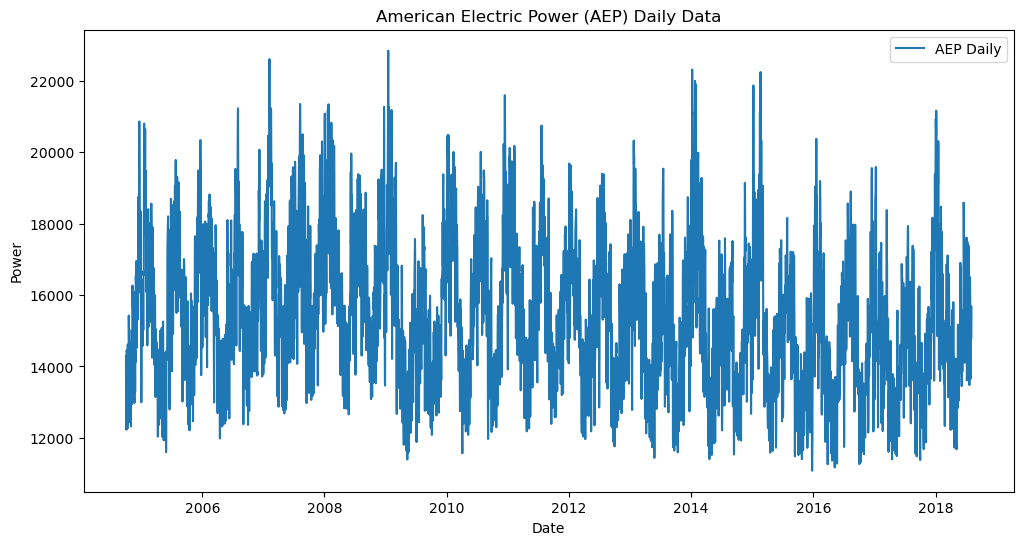

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_daily, label='AEP Daily')
plt.title('American Electric Power (AEP) Daily Data')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()
plt.show()

In [96]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_daily)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Production nucléaire' column is stationary.")
else:
    print("The 'Production nucléaire' column is non-stationary.")

ADF Statistic: -7.487516
p-value: 0.000000
The 'Production nucléaire' column is stationary.


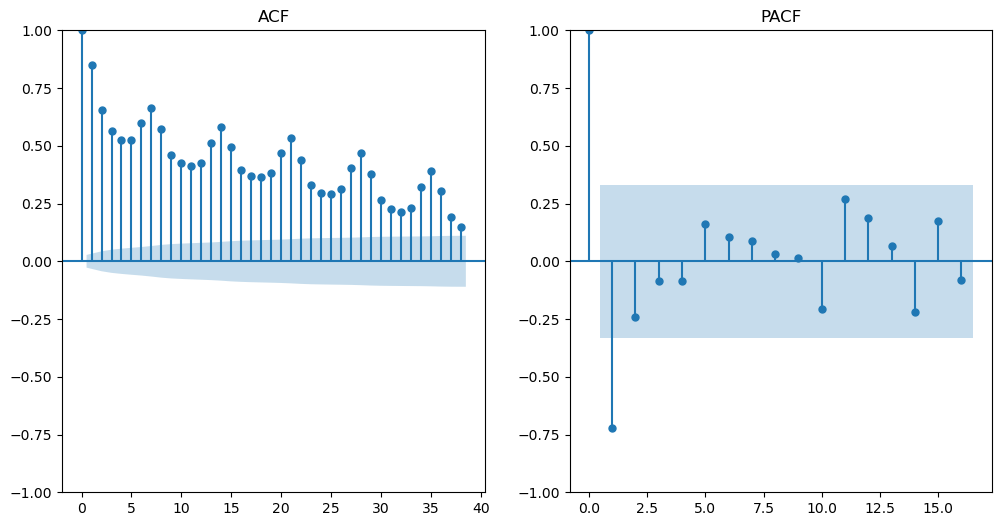

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(df_daily.dropna(), ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(differenced.dropna(), ax=plt.gca())
plt.title('PACF')

plt.show()


In [98]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [100]:
import pmdarima as pm

model = pm.auto_arima(df_daily)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5055
Model:               SARIMAX(5, 1, 1)   Log Likelihood              -41521.955
Date:                Wed, 25 Sep 2024   AIC                          83057.911
Time:                        09:22:19   BIC                          83103.606
Sample:                    10-01-2004   HQIC                         83073.918
                         - 08-03-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1217      0.038      3.244      0.001       0.048       0.195
ar.L2         -0.4655      0.013    -34.852      0.000      -0.492      -0.439
ar.L3         -0.1469      0.021     -6.866      0.0

In [101]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))

metric_aic_dict={}

for param in pdq:
    
        try:
            model = ARIMA(train,order=param)
            model_fit = model.fit()
            
            # Calculer l'AIC
            aic = model_fit.aic
            
            # Stocker les résultats
            metric_aic_dict[param] = aic
        except: 
            continue

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_d

In [102]:
sorted_metric_aic_dict = {k: v for k, v in sorted(metric_aic_dict.items(), key=lambda x: x[1])}
sorted_metric_aic_dict

{(1, 1, 0): 1479949.975307162,
 (1, 1, 1): 1479950.6008386076,
 (1, 0, 1): 1492546.4658304066,
 (0, 1, 1): 1494898.0441159448,
 (1, 0, 0): 1528318.7961642863,
 (0, 1, 0): 1529810.882257798,
 (0, 0, 1): 1683649.5856193742,
 (0, 0, 0): 2816665.4741980685}

## ARIMA(shampo)

In [104]:
import pandas as pd
file_path = "C:\\Users\\Catello\\Desktop\\IAMDS2\\Statistiques\\shampo.csv"
df = pd.read_csv(file_path)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [106]:
df.head()

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3


In [107]:
df.isnull().sum()
duplicate_data = df[df.duplicated()]
print(duplicate_data.sum())

Month      0
Sales    0.0
dtype: object


<Axes: >

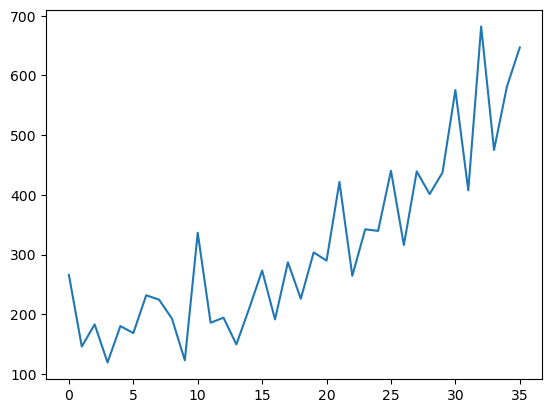

In [108]:
df['Sales'].plot()

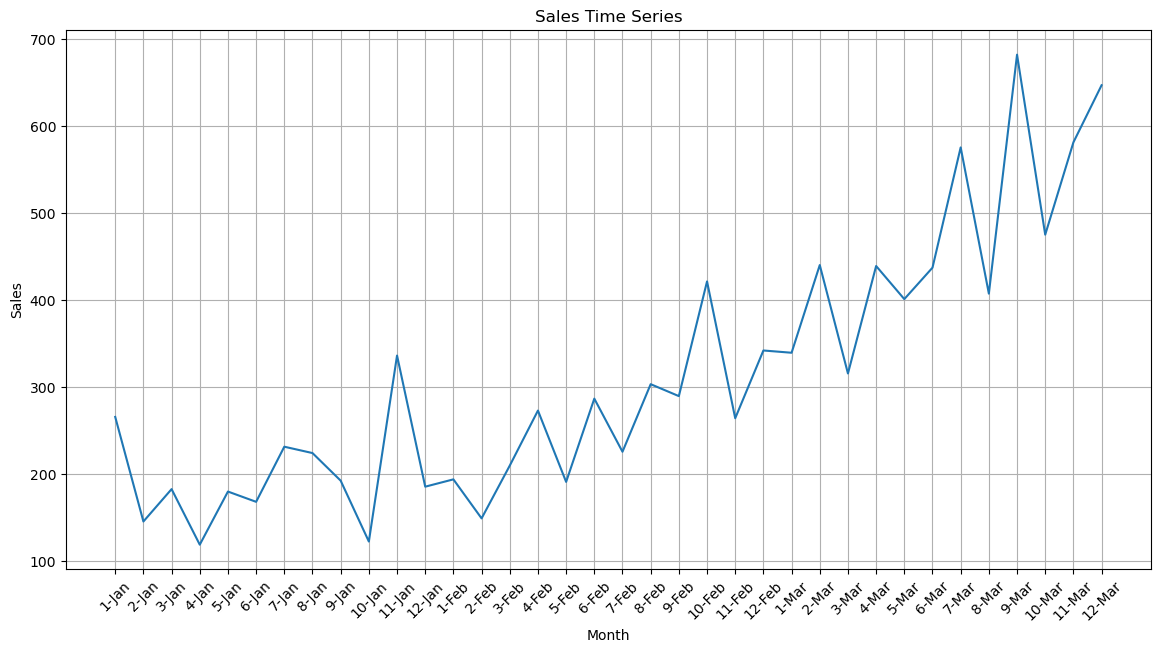

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Set 'Month' as the index
df.set_index('Month', inplace=True)

# Plot the time series data
plt.figure(figsize=(14,7))
plt.plot(df['Sales'])
plt.title('Sales Time Series')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()


In [110]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Sales'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")

ADF Statistic: 3.060142
p-value: 1.000000
The 'Sales' column is non-stationary.


In [111]:
differenced = df['Sales'].diff()
differenced.head()

Month
1-Jan      NaN
2-Jan   -120.1
3-Jan     37.2
4-Jan    -63.8
5-Jan     61.0
Name: Sales, dtype: float64

ADF Statistic: -7.249074
p-value: 0.000000
The 'Sales' column is stationary.


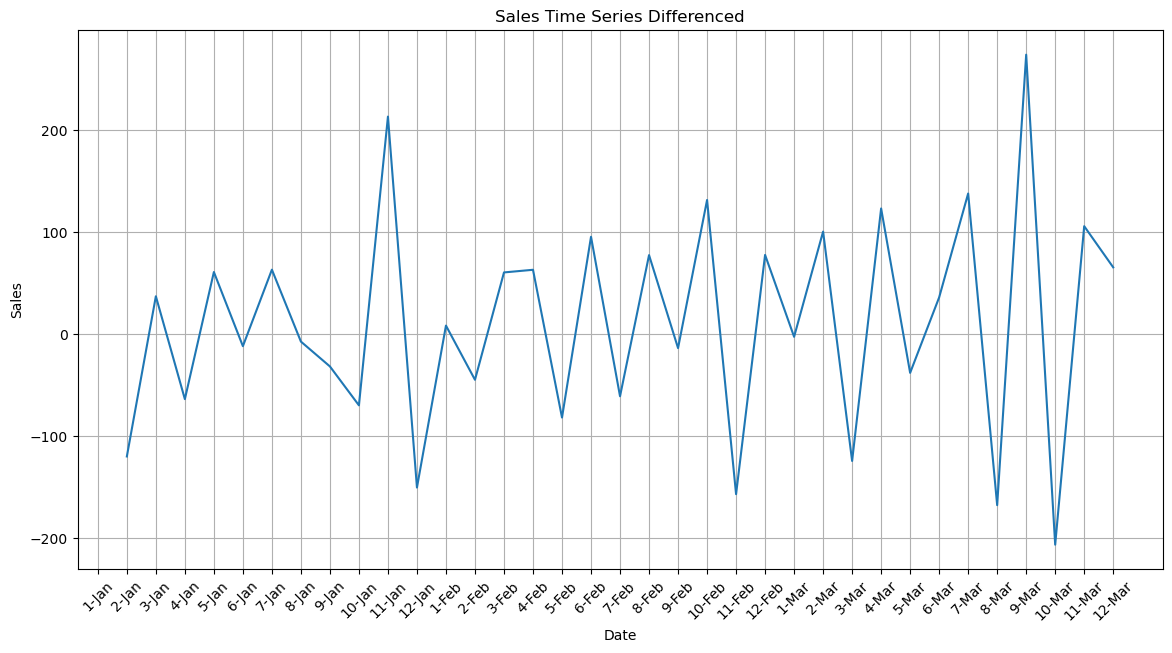

In [112]:
result = adfuller(differenced.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")
    
plt.figure(figsize=(14,7))
plt.plot(differenced)
plt.title('Sales Time Series Differenced')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

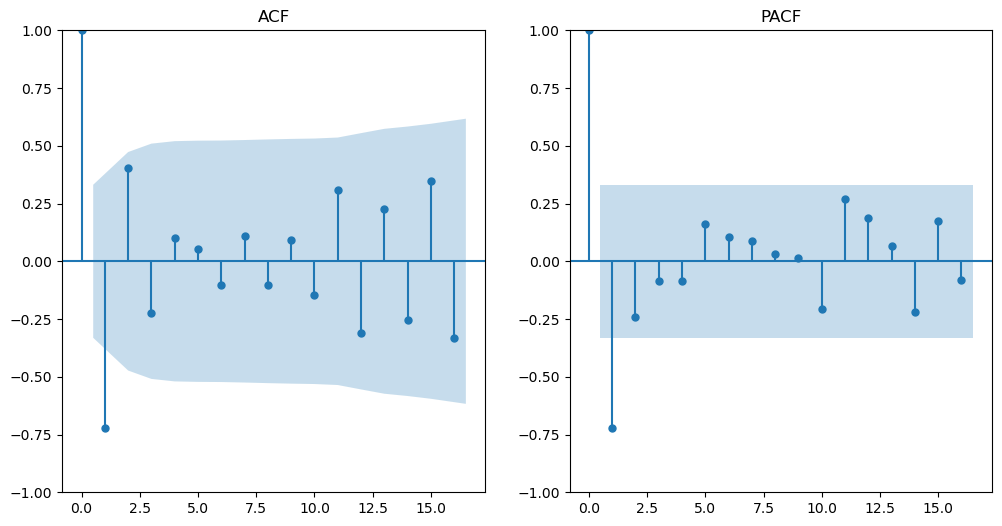

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Tracer les courbes ACF et PACF
plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(differenced.dropna(), ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(differenced.dropna(), ax=plt.gca())
plt.title('PACF')

plt.show()

In [114]:
train_size=int(0.8*len(df))
test_size=int(0.2*len(df))

In [115]:
train=df[:train_size]
test=df[train_size:]

In [116]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Sales'],order=(1,1,1))
model_fit=model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   28
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -151.225
Date:                Wed, 25 Sep 2024   AIC                            308.451
Time:                        09:31:09   BIC                            312.338
Sample:                             0   HQIC                           309.607
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5005      0.324     -1.544      0.123      -1.136       0.135
ma.L1         -0.4111      0.271     -1.516      0.129      -0.942       0.120
sigma2      4165.2385   1267.036      3.287      0.0

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [117]:
prediction=model_fit.predict(start=train_size,end=len(df)-1)

print(prediction)

28    357.166159
29    398.277184
30    377.699596
31    387.999440
32    382.843987
33    385.424482
34    384.132849
35    384.779359
Name: predicted_mean, dtype: float64


C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


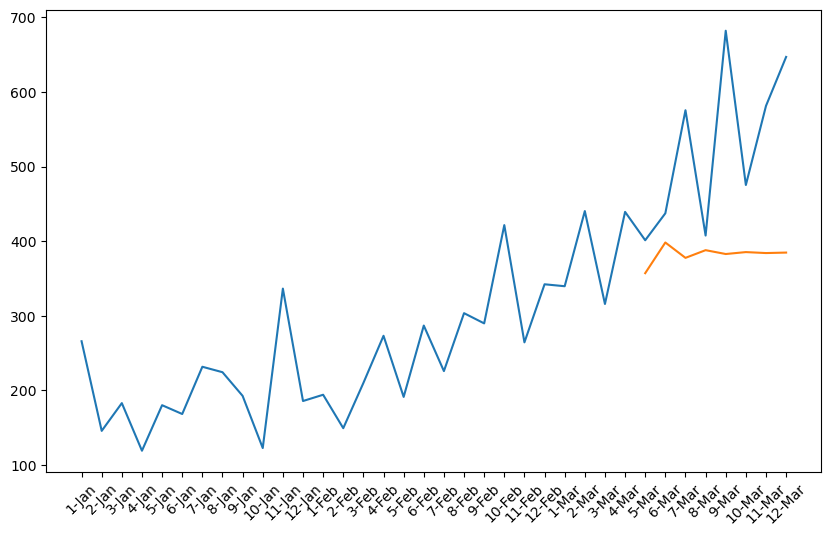

In [118]:
from sklearn.metrics import mean_squared_error

erreur=mean_squared_error(test['Sales'],prediction)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df['Sales'])
plt.plot(prediction)
plt.xticks(rotation=45)
plt.show()

In [119]:
import pmdarima as pm

model2=pm.auto_arima(train['Sales'])

print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -149.355
Date:                Wed, 25 Sep 2024   AIC                            306.710
Time:                        09:31:10   BIC                            311.894
Sample:                             0   HQIC                           308.252
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.1916      3.713      2.206      0.027       0.914      15.469
ma.L1         -1.1569      0.229     -5.049      0.000      -1.606      -0.708
ma.L2          0.4340      0.269      1.611      0.1

In [120]:
predictions2=model2.predict(start=train_size,end=len(df)-1)

residuals=model_fit.resid.dropna()

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [121]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljungbox_result = acorr_ljungbox(model_fit.resid.dropna(), lags=[ 10], return_df=True)

lb_stat = ljungbox_result.iloc[0]['lb_stat']
lb_pvalue = ljungbox_result.iloc[0]['lb_pvalue']

print(f"Ljung-Box Statistic: {lb_stat.round(2)}")
print(f"P-value: {lb_pvalue.round(2)}")

if lb_pvalue > 0.05:
    print("No significant seasonality detected.")
else:
    print("Significant seasonality detected.")


Ljung-Box Statistic: 11.27
P-value: 0.34
No significant seasonality detected.


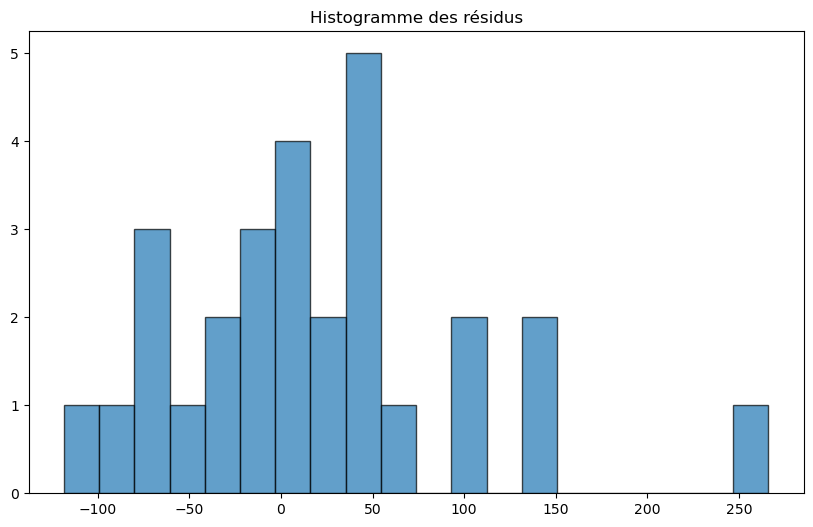

In [122]:
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogramme des résidus')
plt.show()

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


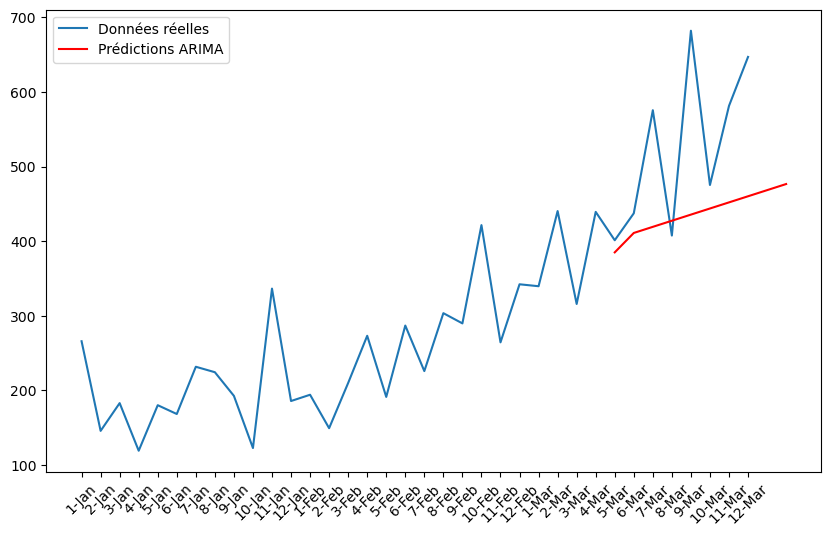

In [123]:
predictions = model_fit.predict(start=len(train), end=len(df)-1)

plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], label='Données réelles')
plt.plot(predictions2, label='Prédictions ARIMA', color='red')
plt.legend()
plt.xticks(rotation=45)
plt.show()
